In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
import os
os.chdir('/content/drive/My Drive/ML Project/ML codes')
!ls

dataset			   LR_training.ipynb   MNB.ipynb
Dataset_Exploration.ipynb  LSTM_train.ipynb    models
dataset_preprocess.ipynb   ML_Pipelines.ipynb  outputs


In [0]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split


In [4]:
df = pd.read_csv('outputs/processed_wos.csv', encoding='latin-1')
df.head()

,text,label,hashtags,users,links,processed_text
0,"""like this if you are a tribe fan""",0,[],[],[],like tribe fan
1,"""you're idiot.......................""",1,[],[],[],idiot
2,"""I am a woman Babs, and the only ""war on women...",1,[],[],[],woman babs war woman see coming jackazzes like...
3,"""WOW & YOU BENEFITTED SO MANY WINS THIS YEAR F...",1,[],[],[],wow benefitted many win year bat nice stupid
4,"""haha green me red you now loser whos winning ...",1,[],[],[],haha green red loser who winning moron


In [5]:
df['processed_text'] = df['processed_text'].str.cat(df['hashtags'], sep =' ')
df.head()

,text,label,hashtags,users,links,processed_text
0,"""like this if you are a tribe fan""",0,[],[],[],like tribe fan []
1,"""you're idiot.......................""",1,[],[],[],idiot []
2,"""I am a woman Babs, and the only ""war on women...",1,[],[],[],woman babs war woman see coming jackazzes like...
3,"""WOW & YOU BENEFITTED SO MANY WINS THIS YEAR F...",1,[],[],[],wow benefitted many win year bat nice stupid []
4,"""haha green me red you now loser whos winning ...",1,[],[],[],haha green red loser who winning moron []


In [0]:
import re
def preprocess(text):
    text = re.sub(r'[^\w\d\s]', ' ', str(text))
    text = re.sub('[Ã]', ' ', str(text))
    return ' '.join(term for term in text.split())
df['processed_text'] = df.processed_text.apply(lambda row : preprocess(row))

In [7]:
df.head()

,text,label,hashtags,users,links,processed_text
0,"""like this if you are a tribe fan""",0,[],[],[],like tribe fan
1,"""you're idiot.......................""",1,[],[],[],idiot
2,"""I am a woman Babs, and the only ""war on women...",1,[],[],[],woman babs war woman see coming jackazzes like...
3,"""WOW & YOU BENEFITTED SO MANY WINS THIS YEAR F...",1,[],[],[],wow benefitted many win year bat nice stupid
4,"""haha green me red you now loser whos winning ...",1,[],[],[],haha green red loser who winning moron


In [0]:
pd.DataFrame(df, columns=['text','label','hashtags', 'users', 'links', 'processed_text']).to_csv('outputs/train.csv', index = False)

In [0]:
tfidf_vec = TfidfVectorizer(ngram_range=(1,3), max_features=10000)
tfidf_text = tfidf_vec.fit_transform(df.processed_text)

In [10]:
tfidf_text.shape

(196388, 10000)

In [11]:
tfidf_vec.idf_.shape

(10000,)

In [0]:
import pickle
pickle.dump(tfidf_vec, open("models/tfidf_final.pickle", "wb")) # Saving tfidf
pickle.dump(tfidf_vec.idf_, open("models/idf_final.pickle", "wb")) # Saving idf
pickle.dump(tfidf_vec.vocabulary_, open("models/vocabulary_final.pickle", "wb")) # saving vocab

In [13]:
vectorizer = pickle.load(open("models/idf_final.pickle", "rb"))
vectorizer.shape

(10000,)

In [14]:
vocabulary = pickle.load(open("models/vocabulary_final.pickle", "rb"))
len(vocabulary)

10000

In [0]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_text, df['label'], test_size=0.2, random_state = 42)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=2019, C=100, max_iter=10000).fit(X_train, y_train)

In [16]:
predictions = classifier.predict(X_test).tolist()
wrong = []
count = 0
for i in range(len(y_test)):
    if y_test.iloc[i] != predictions[i]:
        count += 1
        wrong.append(i)

      
print('Total number of test cases', len(y_test))
print('Number of wrong of predictions', count)


Total number of test cases 39278
Number of wrong of predictions 2483


In [17]:
from sklearn.metrics import classification_report
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96     31875
           1       0.80      0.89      0.84      7403

    accuracy                           0.94     39278
   macro avg       0.89      0.92      0.90     39278
weighted avg       0.94      0.94      0.94     39278



In [18]:
predictions_train = classifier.predict(X_train).tolist()
print(classification_report(predictions_train, y_train))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97    127183
           1       0.84      0.93      0.88     29927

    accuracy                           0.95    157110
   macro avg       0.91      0.94      0.93    157110
weighted avg       0.96      0.95      0.95    157110



In [0]:
import pickle
pickle.dump(classifier, open('models/LR_model_final.sav', 'wb'))

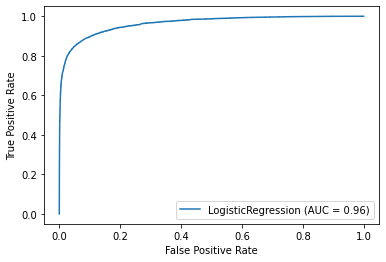

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve
plot_roc_curve(classifier, X_test, y_test)
plt.show()